# Explore here

# Paso 1
# Planteamiento del problema y recolección de la data

* Una empresa ha recolectado la información del alquiler de viviendas en Nueva York a través de la aplicación Airbnb durante el año 2019
* El objetivo principal de este analisis estara enfocado en establecer en que vecindarios se presentan los mayores valores de los inmuebles.

In [25]:
# Your code here
import pandas as pd
import os 

# Importar archivo csv
df_abny=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df_abny


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [26]:
# Informacion del df
print(df_abny.columns)

df_abny.describe()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Paso 2
# Exploracion y limpieza de datos

In [27]:
df_abny.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [28]:
print(df_abny.shape)
# Conocer los valores nulos
nulos=df_abny.isnull().sum()
print(nulos)
# Conocer los valores duplicados
df_abny.duplicated().sum()

(48895, 16)
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


np.int64(0)

El DataSet consta de 48895 registros, 16 columnas con la siguiente distribucion y dtypes: 
* 3 tipo float64 
* 7 tipo int64 y 
* 6 tipo object. 

Entre las columnas se encuentra la clase a predecir: price. 

Se encontraron 20141 datos nulos ubicados en cuatro columnas:
* name: 16
* host_name: 21
* last_review: 10052
* reviews_per_month: 10052

No se encontraron registros duplicados

In [29]:
# Eliminamos valores con precio igual a 0
df_abny.drop(df_abny[df_abny['price'] == 0].index, inplace=True)

# Eliminar columnas innecesarias
df_abny.drop(['id','name','host_name','last_review','reviews_per_month'],axis=1,inplace=True)
df_abny.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48884 non-null  int64  
 1   neighbourhood_group             48884 non-null  object 
 2   neighbourhood                   48884 non-null  object 
 3   latitude                        48884 non-null  float64
 4   longitude                       48884 non-null  float64
 5   room_type                       48884 non-null  object 
 6   price                           48884 non-null  int64  
 7   minimum_nights                  48884 non-null  int64  
 8   number_of_reviews               48884 non-null  int64  
 9   calculated_host_listings_count  48884 non-null  int64  
 10  availability_365                48884 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.5+ MB


# Paso 3
# Análisis de variables Univariable

In [30]:
# Conteo tipo de propiedad
df_abny['room_type'].value_counts()


room_type
Entire home/apt    25407
Private room       22319
Shared room         1158
Name: count, dtype: int64

In [31]:
# Conteo propiedades por grupo de vecindarios
df_abny['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: count, dtype: int64

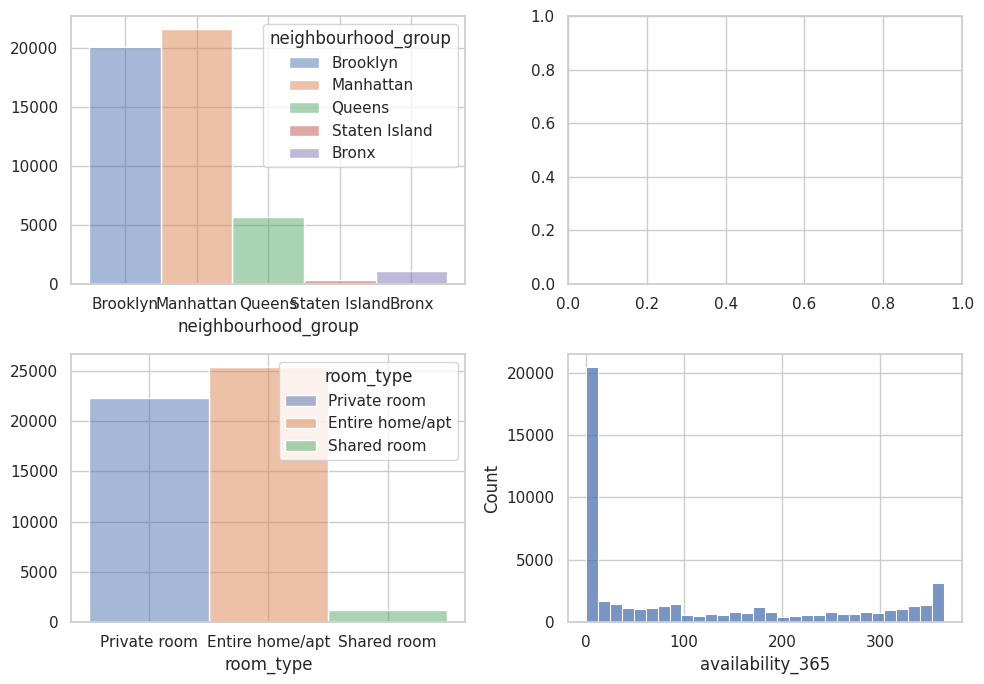

In [32]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Histogramas 
sns.histplot(ax = axis[0, 0], data = df_abny, x = "neighbourhood_group", hue='neighbourhood_group').set(ylabel = None)

sns.histplot(ax = axis[1, 0], data = df_abny, x = "room_type", hue='room_type').set(ylabel = None)

sns.histplot(ax = axis[1,1], data = df_abny, x = "availability_365")

plt.tight_layout()
plt.show()

3.1. Univariante Categoricas

* eighbourhood_group: 
    - Manhattan tiene la mayor cantidad de propiedades con 21661 (44,3%), segundo Brooklyn con 20104 (41,1%), Queens, Bronx y Staten Island completan los datos  aproximadamente el 15%.
* neighbourhood: 
    - Williamsburg es el vecindario con mas propiedades con 3920, segundo Bedford-Stuyvesant con 3714, Harlem con 2658, Bushwick con 2465 y Upper West Side 1971
* room_type: 
    - El tipo de propiedad Entire home/apt es el mas alquilado con 25409, seguido por Private room con 22326 y Shared room con 1160.

In [33]:
# Variable precio
df_abny['price'].describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [34]:
df_abny['availability_365'].describe()

count    48884.000000
mean       112.779498
std        131.627271
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

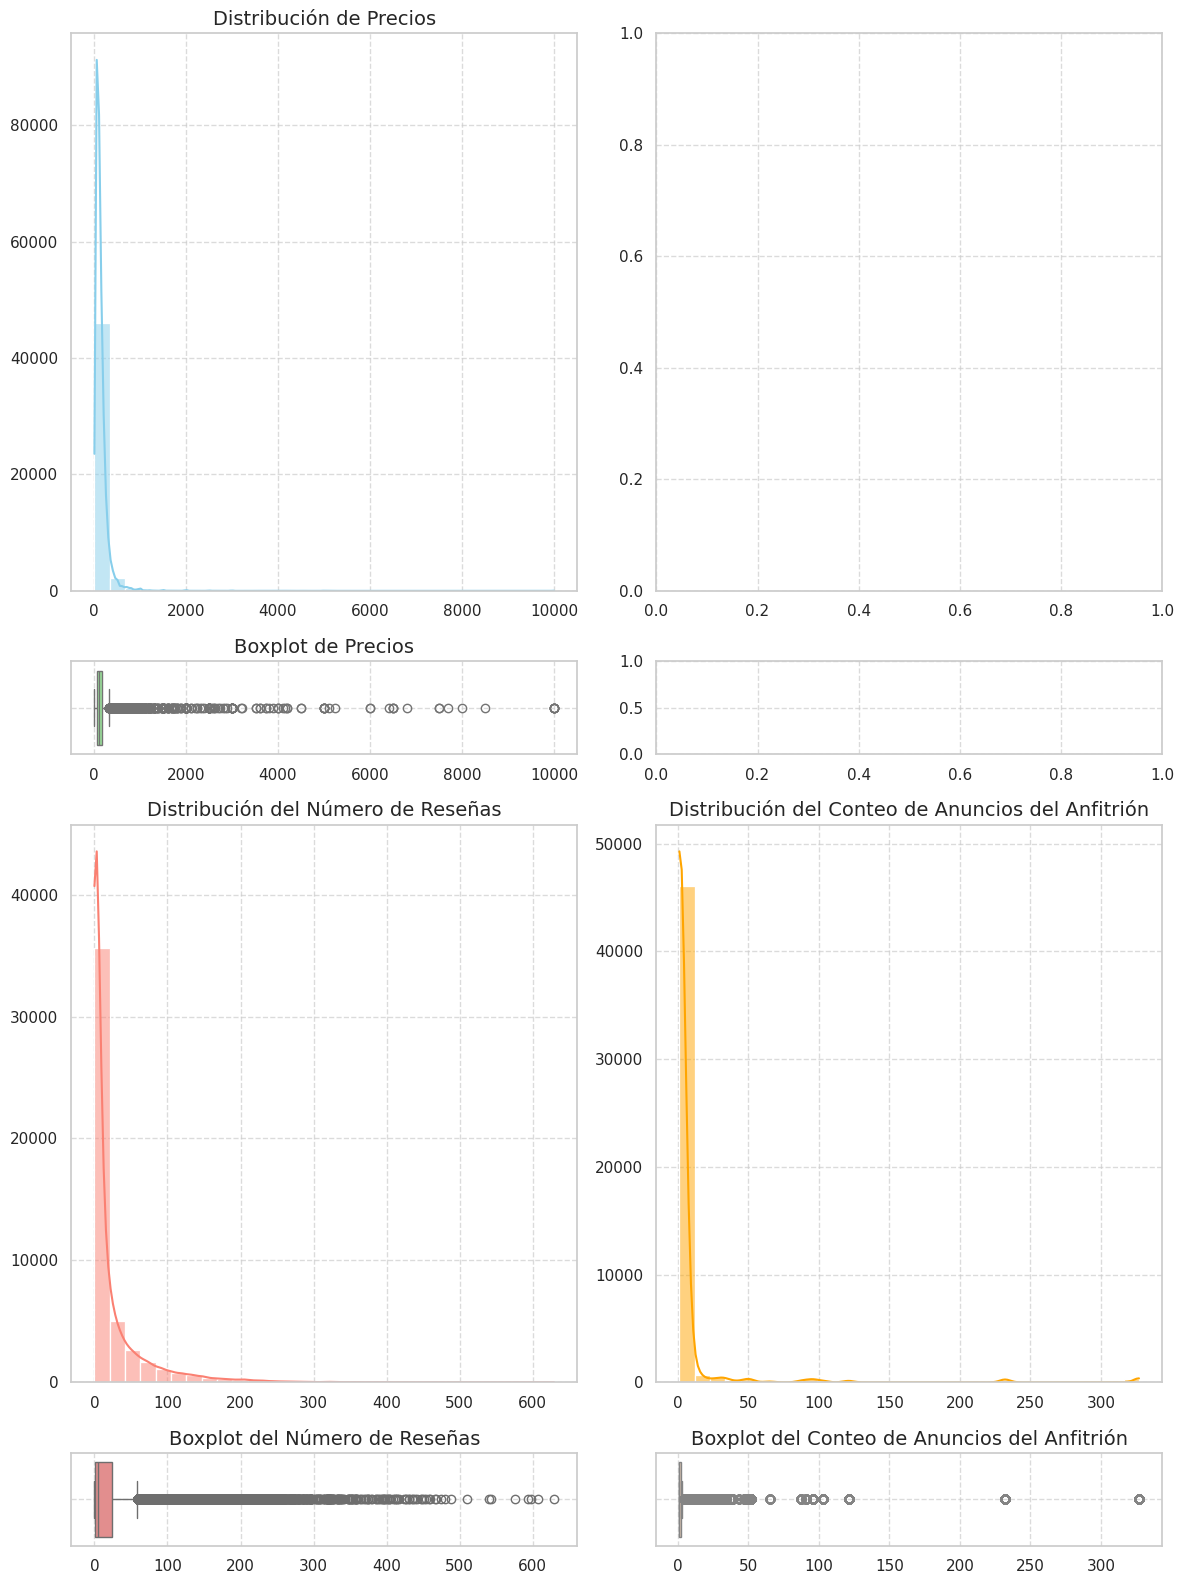

In [35]:
# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear los subplots
fig, axis = plt.subplots(4, 2, figsize=(12, 16), gridspec_kw={"height_ratios": [6, 1, 6, 1]})

# Histograma y Boxplot para 'price'
sns.histplot(ax=axis[0, 0], data=df_abny, x="price", bins=30, kde=True, color="skyblue")
sns.boxplot(ax=axis[1, 0], data=df_abny, x="price", color="lightgreen")
axis[0, 0].set_title('Distribución de Precios', fontsize=14)
axis[1, 0].set_title('Boxplot de Precios', fontsize=14)

# Histograma y Boxplot para 'number_of_reviews'
sns.histplot(ax=axis[2, 0], data=df_abny, x="number_of_reviews", bins=30, kde=True, color="salmon")
sns.boxplot(ax=axis[3, 0], data=df_abny, x="number_of_reviews", color="lightcoral")
axis[2, 0].set_title('Distribución del Número de Reseñas', fontsize=14)
axis[3, 0].set_title('Boxplot del Número de Reseñas', fontsize=14)

# Histograma y Boxplot para 'calculated_host_listings_count'
sns.histplot(ax=axis[2, 1], data=df_abny, x="calculated_host_listings_count", bins=30, kde=True, color="orange")
sns.boxplot(ax=axis[3, 1], data=df_abny, x="calculated_host_listings_count", color="peachpuff")
axis[2, 1].set_title('Distribución del Conteo de Anuncios del Anfitrión', fontsize=14)
axis[3, 1].set_title('Boxplot del Conteo de Anuncios del Anfitrión', fontsize=14)

# Ajustar etiquetas de los ejes
for ax in axis.flat:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

3.2. Univariante Numerica

* price: 
    - La variable precio tiene un sesgo positivo, se tiene un valor maximo de 10000. La media es 152.7 y con mediana de 106, evidenciandose un sesgo o asimetria positiva. Existen 11 registros con precio cero (0) que seran eliminados de la data, estos registros no afectan los valores de la media y mediana. El 83% de los datos se encuentran entre 10 y 200 dolares, 12% de los precios entre 200 y 350, finalmente, el 5% superior a 350.
* calculated_host_listings_count:
    - El 66% de los valores son menores o iguales a 1, el 27,8% son valores mayores a 1 y menores o iguales a 10, el 4,5% estan ubicados sobre 10 y menores o iguales a 100, por encima de 100 se encuentra el 1,7%. Esta variable tiene un media de 7,14, una moda de y un valor maximo de 327.

# Paso 4
# Analisis Multivariable

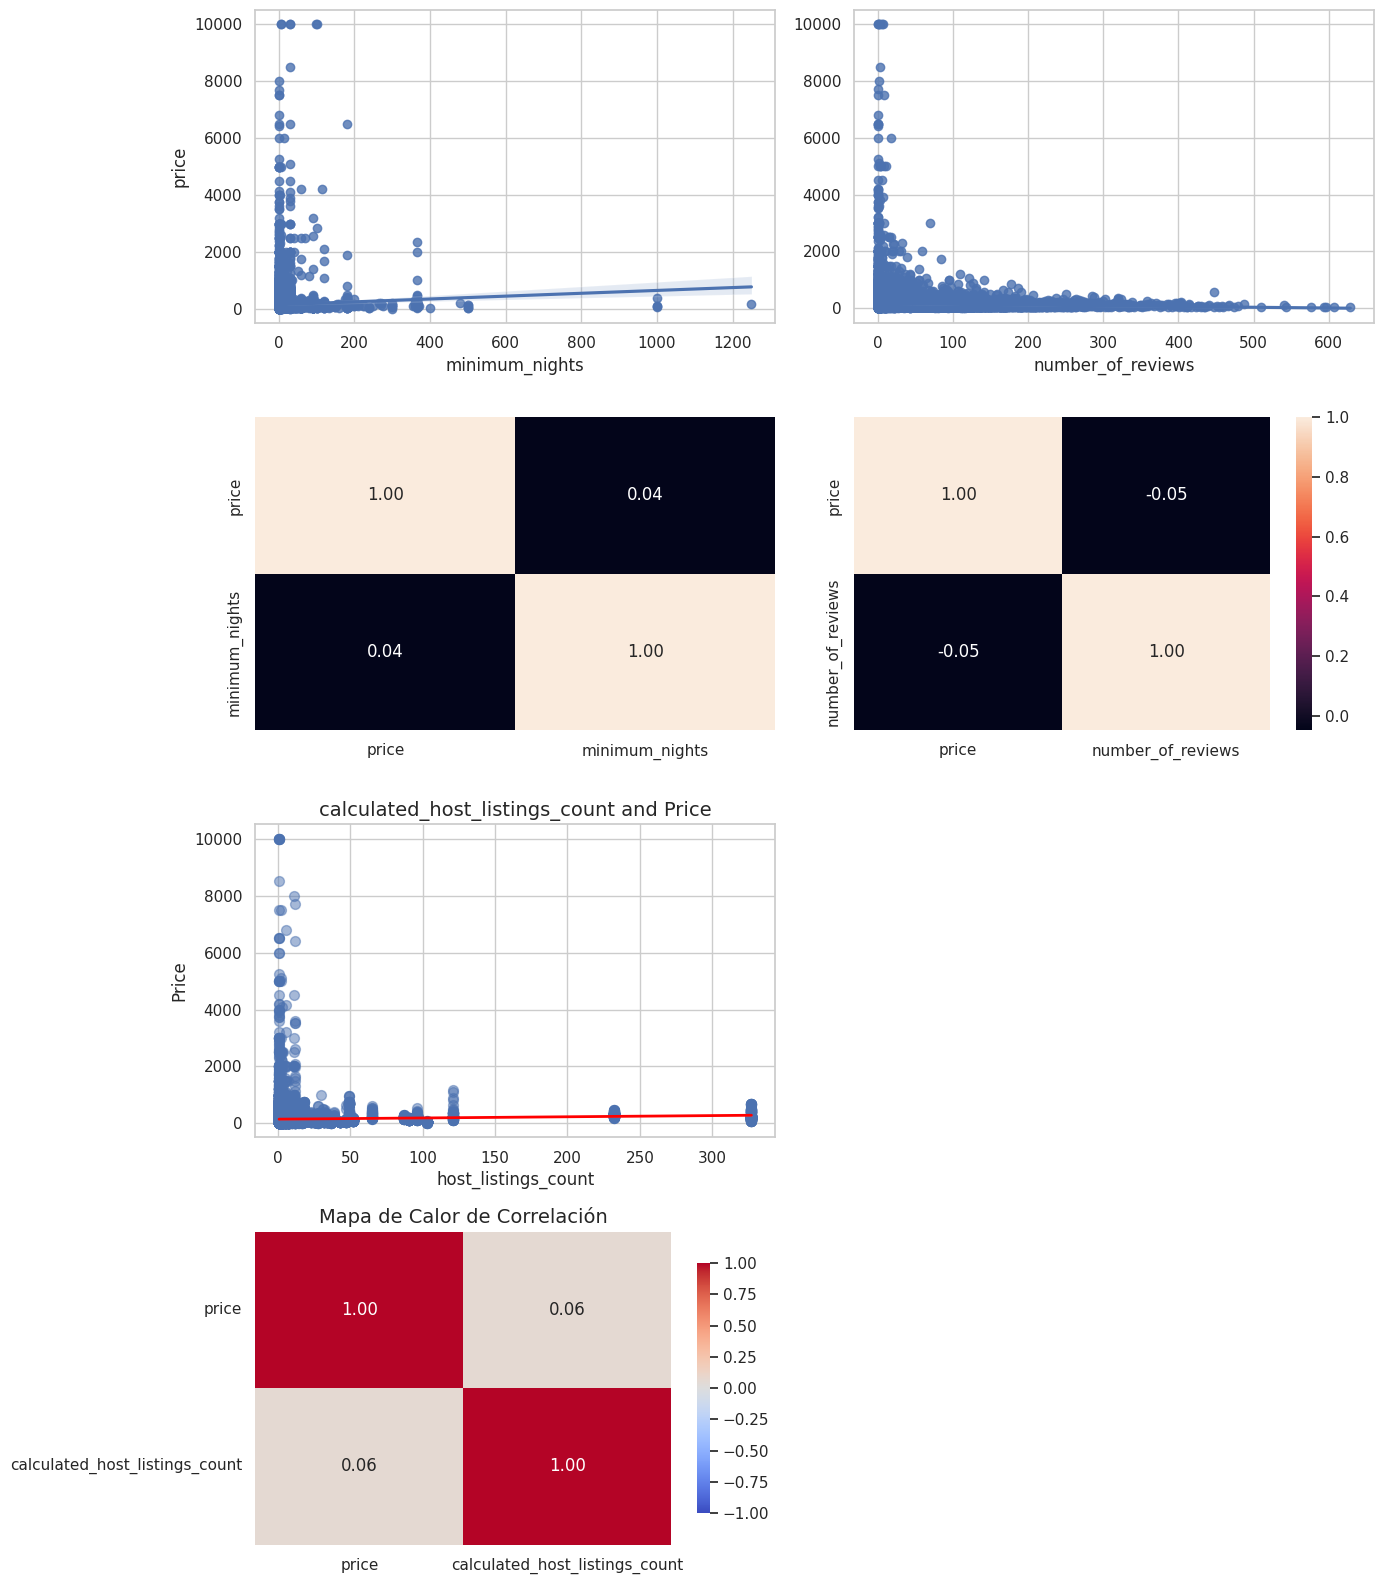

In [39]:
# Analisis numerico - numerico
fig, axis = plt.subplots(4, 2, figsize = (14, 16))

sns.regplot(ax = axis[0, 0], data = df_abny, x = "minimum_nights", y = "price")
sns.heatmap(df_abny[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df_abny, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(df_abny[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax=axis[2, 0], data=df_abny, x="calculated_host_listings_count", y="price", scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red', 'linewidth':2})
axis[2, 0].set_title('calculated_host_listings_count and Price', fontsize=14)
axis[2, 0].set_xlabel('host_listings_count', fontsize=12)
axis[2, 0].set_ylabel('Price', fontsize=12)
sns.heatmap(df_abny[["price", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=axis[3, 0], vmin=-1, vmax=1, cbar_kws={'shrink': 0.8})
axis[3, 0].set_title('Mapa de Calor de Correlación', fontsize=14)

# Eliminar ejes vacíos
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()
plt.show()

El analisis de las variables numericas arrojan:
* No existe relación entre el precio y el número mínimo de noches.
* No hay relación entre el número de reseñas y el precio.

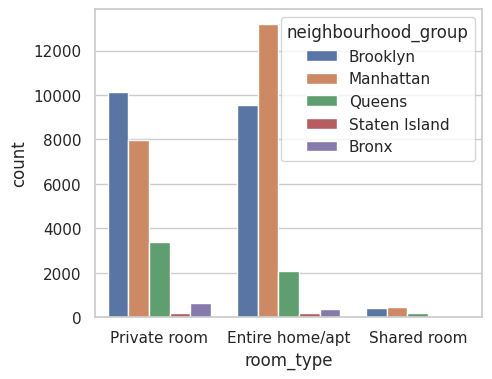

In [40]:
# Analisis categorico - categorico
fig, axis = plt.subplots(figsize = (5, 4))
sns.countplot(data = df_abny, x = "room_type", hue = "neighbourhood_group")

plt.show()

El analisis de las variables categoricas arroja:
* Manhattan es el grupo que tiene más lugares completos para alquilar.
* Brooklyn es el segundo grupo más grande en alquilar, pero tiene más habitaciones privadas.
* Queens y Bronx son el tercero y cuarto y comparten con Brooklyn mayor numero de habitaciones privadas.
* Staten no representa mayores datos.


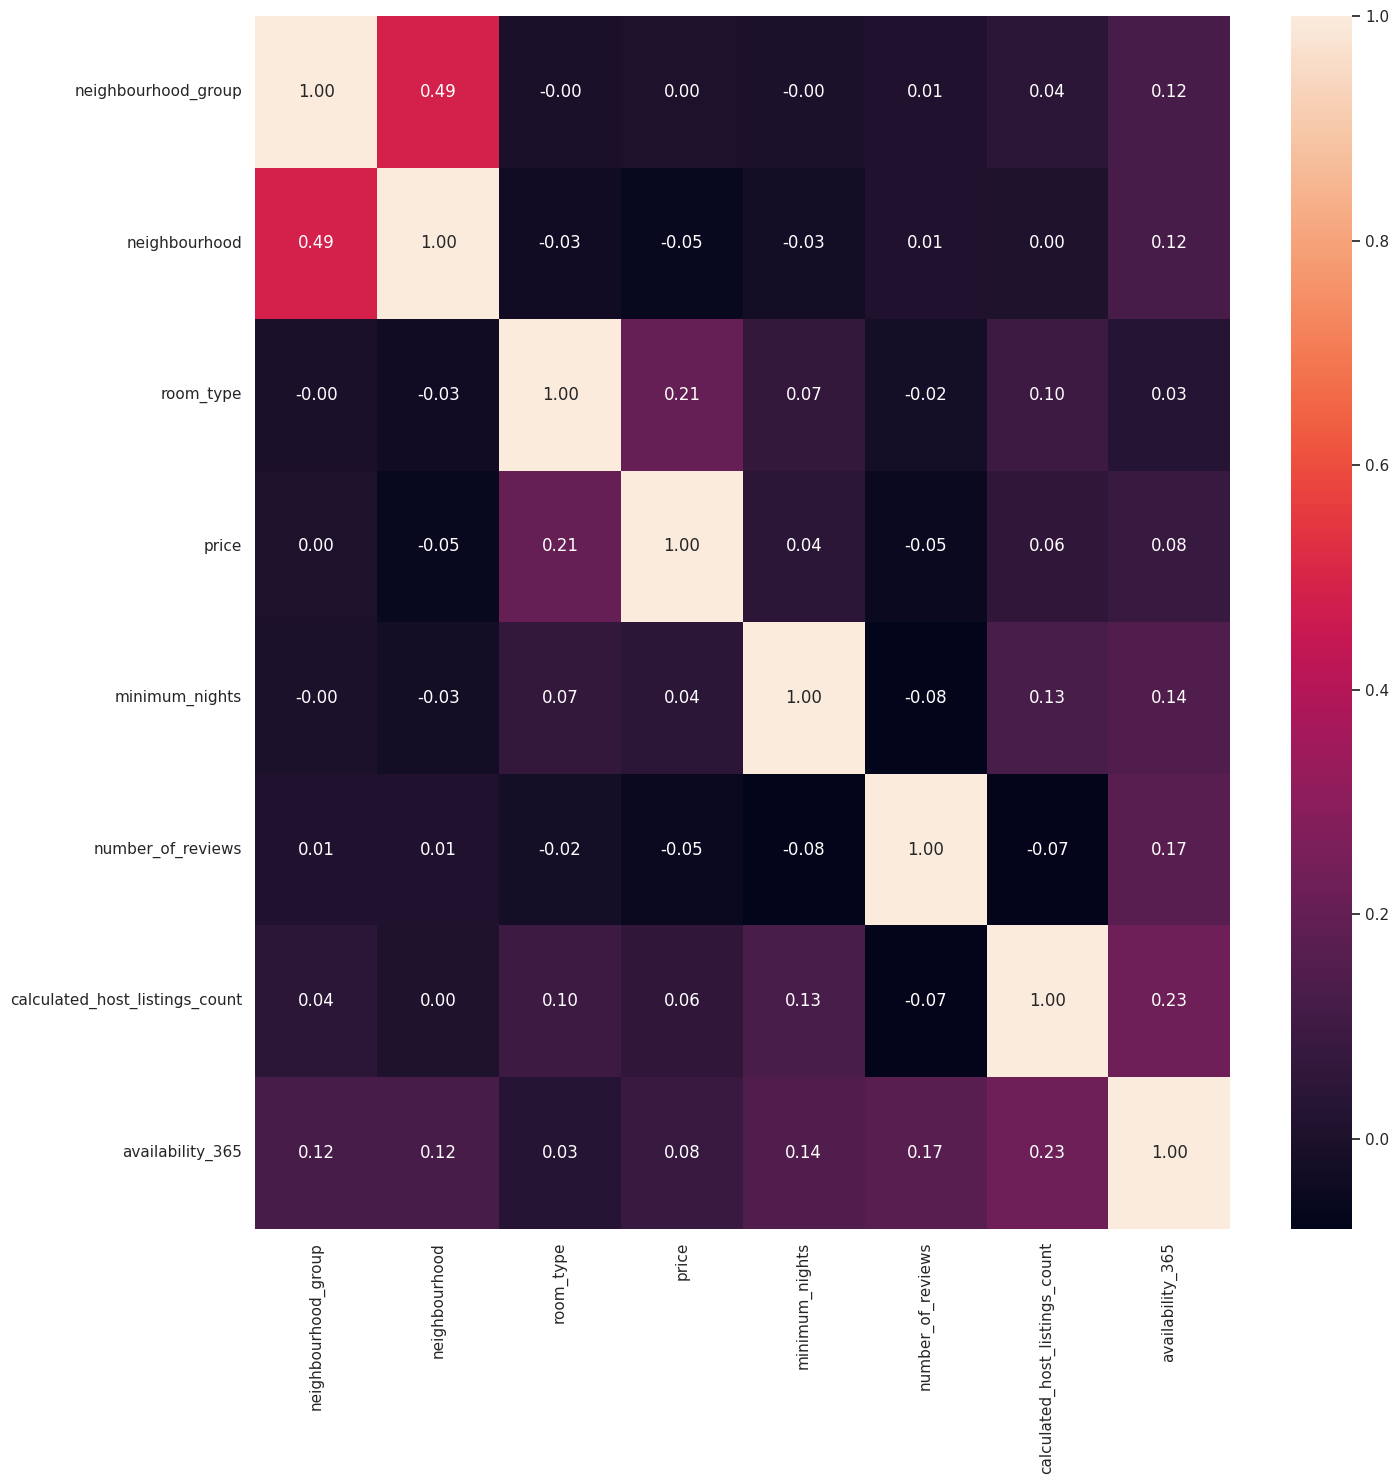

In [41]:
# Factorizar variables para matriz de correlacion
df_abny["room_type"] = pd.factorize(df_abny["room_type"])[0]
df_abny["neighbourhood_group"] = pd.factorize(df_abny["neighbourhood_group"])[0]
df_abny["neighbourhood"] = pd.factorize(df_abny["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df_abny[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Al analizar los datos notamos que hay una correlación muy baja entre todos los datos y en algunas ocaciones negativa.